## Part Three - Visualizations
#### At this point we would like to present our information in a different way like graphs for example so that we can learn better about the data we have stored.
#### In addition, we would like to understand whether there is a correlation between certain columns,
#### We will also learn about our strings such as the Discription column, we will understand what are the most common words in order to reach the stage of machine learning more prepared.
##### It is important to note that our main goal in the end is to predict whether a film will be successful in Netflix so we need to compare our goal column with the rest of the data and understand what sets films that are particularly favored apart that already exist today on Netflix.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [3]:
#import the DF after Data Cleaning
df = pd.read_csv('DF_After_DataCleaning.csv', header = 0, sep = ',')

### Columns Correlation -
#### First, we want to check if there is any connection between columns in our DF

<AxesSubplot:>

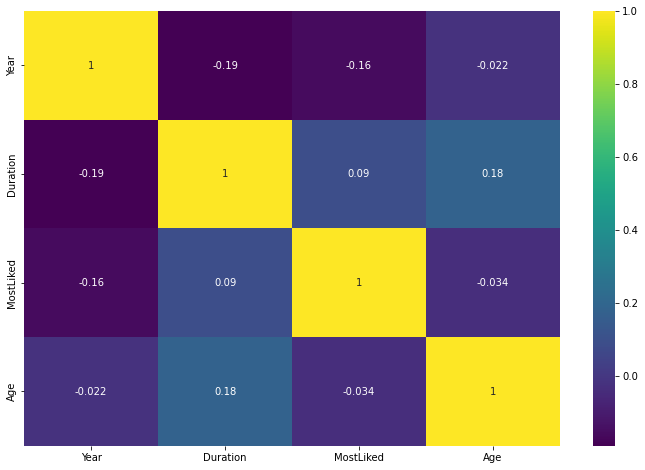

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

### It can be concluded that there is no significant relationship between columns in our DF

#### example of two columns (year, duration) without correlation

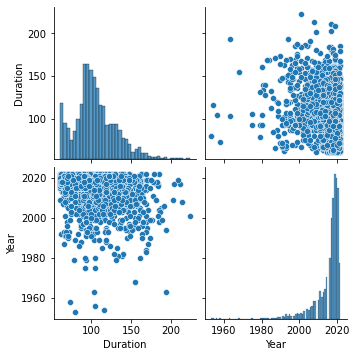

In [5]:
sns.pairplot(df[['Duration', 'Year']])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        2630 non-null   object 
 1   Year         2630 non-null   float64
 2   Duration     2630 non-null   int64  
 3   MostLiked    2630 non-null   float64
 4   Description  2630 non-null   object 
 5   Director     2630 non-null   object 
 6   FullCast     2630 non-null   object 
 7   GenreFull    2630 non-null   object 
 8   AboutFull    2630 non-null   object 
 9   Age          2630 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 205.6+ KB


In [7]:
df.describe()

,Year,Duration,MostLiked,Age
count,2630.000000,2630.000000,2630.000000,2630.000000
mean,2015.559316,104.571103,0.019392,13.169582
std,7.416641,24.917118,0.137923,3.913595
min,1953.000000,61.000000,0.000000,0.000000
25%,2014.000000,90.000000,0.000000,13.000000
50%,2018.000000,101.000000,0.000000,13.000000
75%,2020.000000,118.000000,0.000000,16.000000
max,2022.000000,223.000000,1.000000,18.000000


### In this section we will present a number of graphs that present our data visually

Text(0.5, 1.0, 'Age Distribution')

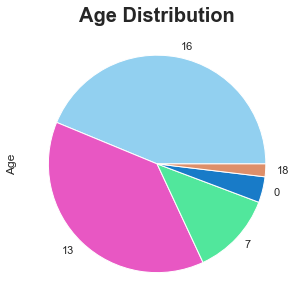

In [44]:
mycolors = ['#92D0F0', '#E857C3','#51E79C', '#187BC8','#DE8F6A']
df['Age'].value_counts().plot(kind='pie',figsize=(10,5), colors=mycolors)
plt.title('Age Distribution', size = 20,fontweight="bold")

Text(0, 0.5, 'Count')

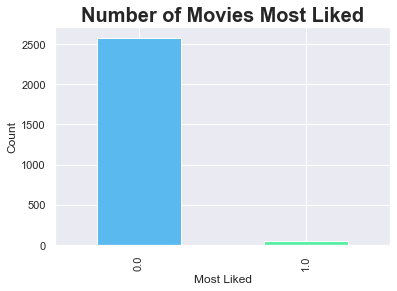

In [42]:
mycolors = ['#5AB9EF', '#5AEFA5']
df["MostLiked"].value_counts().plot(kind='bar', color = mycolors)
plt.title('Number of Movies Most Liked', size=20,fontweight="bold")
plt.xlabel('Most Liked')
plt.ylabel('Count')

Text(0, 0.5, 'count')

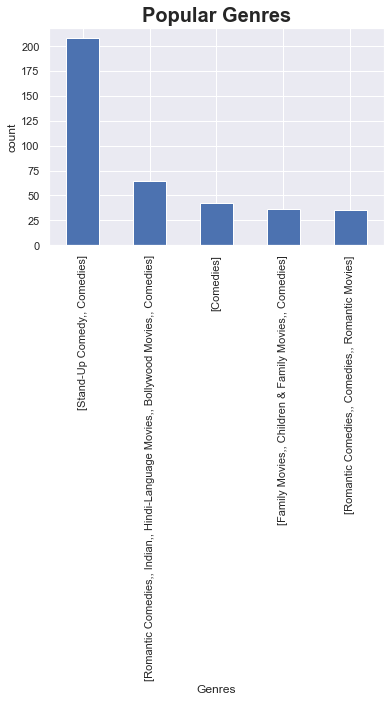

In [41]:
df['GenreFull'].value_counts().loc[lambda x:x>30].plot(kind='bar')
plt.title('Popular Genres',size=20, fontweight="bold")
plt.xlabel('Genres')
plt.ylabel('count')

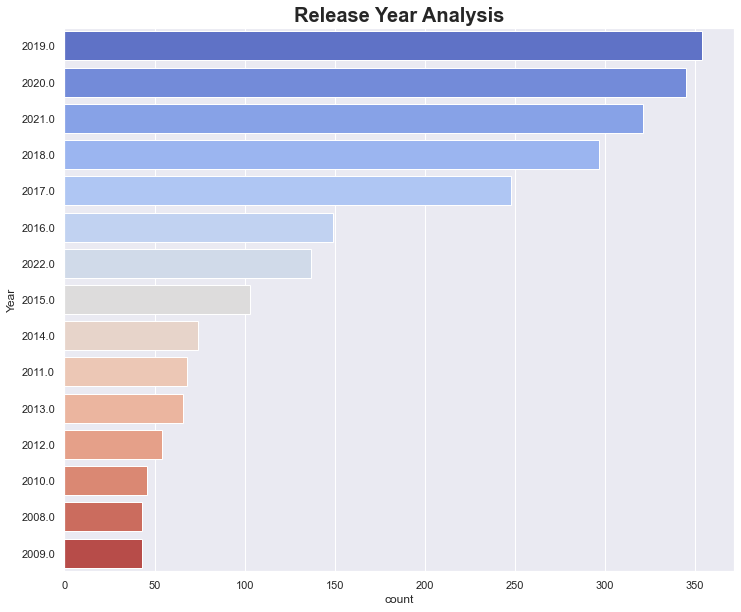

In [34]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="Year", data=df, palette="coolwarm", order=df['Year'].value_counts().index[0:15])

plt.title('Release Year Analysis', fontsize=20, fontweight='bold')
plt.show()

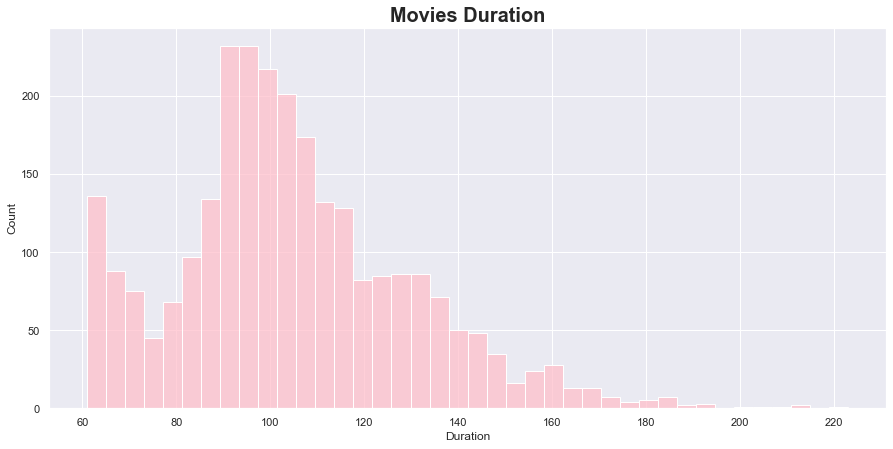

In [35]:
plt.figure(figsize=(15,7))
sns.histplot(df['Duration'],kde=False, color=['pink'])
plt.title('Movies Duration',fontweight="bold",size=20)
plt.show()

## Text analysis by Description column -
### In this image we can see that the size of the word indicates its frequency, The larger the word, the greater its occurrences in the text.


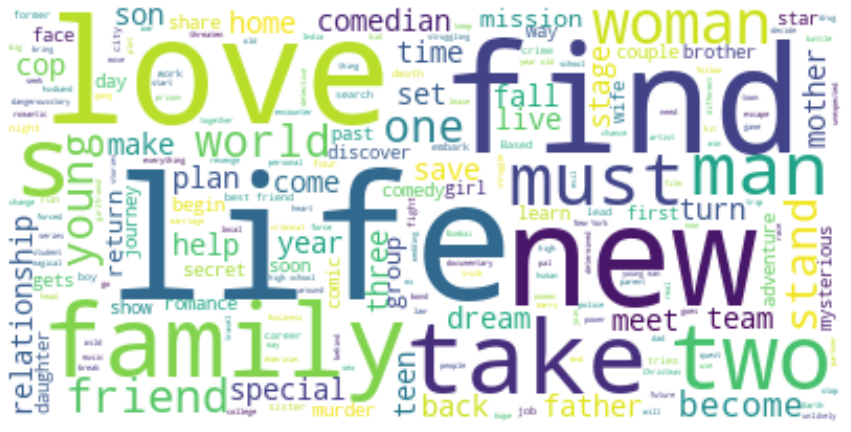

In [13]:
text = " ".join(i for i in df.Description)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
#show for each year how many movies is most liked or not
ty = pd.crosstab(df['Year'], df['MostLiked'])

In [15]:
#NORMALIZE
ty1 = pd.crosstab(df['Year'], df['MostLiked'], normalize = 'index')
ty1

MostLiked,0.0,1.0
Year,,
1953.0,1.000000,0.000000
1954.0,1.000000,0.000000
1956.0,1.000000,0.000000
1958.0,1.000000,0.000000
1963.0,1.000000,0.000000
1968.0,1.000000,0.000000
1975.0,1.000000,0.000000
1979.0,1.000000,0.000000
1980.0,1.000000,0.000000


Text(0, 0.5, 'Most liked frequency')

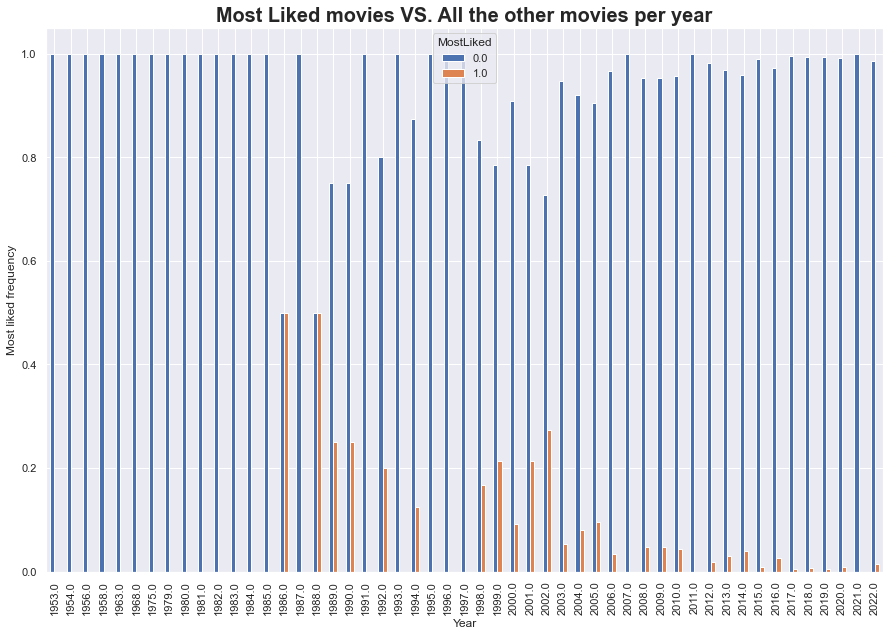

In [39]:
ty1.plot(kind='bar', figsize=(15,10))
plt.title('Most Liked movies VS. All the other movies per year', size=20, fontweight="bold")
plt.xlabel('Year')
plt.ylabel('Most liked frequency')

In [17]:
df["GenreFull"] = df["GenreFull"].apply(eval)

In [18]:
df['GenreFull'] = df['GenreFull'].replace(', ', '","')
df['GenreFull'] = df['GenreFull'].replace('[', '["')
df['GenreFull'] = df['GenreFull'].replace(']', '"]')

In [19]:
Genre_disc = {}
for i in df["GenreFull"]:
    for j in i:
        if j not in Genre_disc:
            Genre_disc[j] = 1
        else:
            Genre_disc[j] += 1

In [20]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [21]:
to_1D(df["GenreFull"]).value_counts()

Comedies                      693
Indian,                       484
Dramas,                       479
Comedies,                     440
Romantic Movies               404
                             ... 
TV Shows Based on Comics,       1
Westerns                        1
Hindi-Language Movies           1
Ukrainian,                      1
K-Dramas based on Webtoon,      1
Length: 182, dtype: int64

Text(0.5, 1.0, 'Genre frequency')

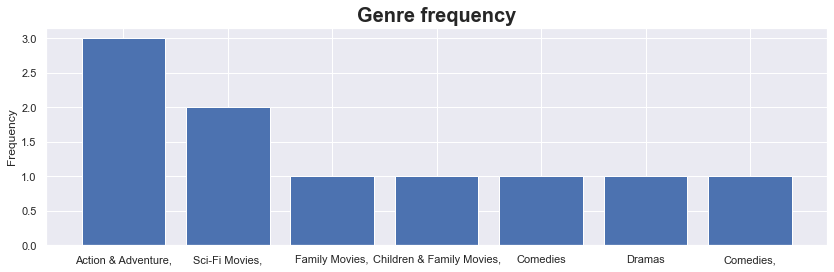

In [40]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df["GenreFull"]).iloc[:10].value_counts().index,
        to_1D(df["GenreFull"]).iloc[:10].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Genre frequency", size = 20,fontweight="bold")